In [61]:
pwd

'C:\\Users\\chiwi\\OneDrive - Stellenbosch University'

In [62]:
import os
import pandas as pd

# Path to the folder containing telematics datasets
folder_path = "C:\\Users\\chiwi\\OneDrive - Stellenbosch University\\telematics_data\\"

#all files in the folder
file_list = os.listdir(folder_path)

# list to store loaded dataframes
dataframes = []


for file in file_list:
    if file.endswith(".csv"):  
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)



In [63]:
dataframes[0]

,partition_date,id,vehicleid,coordinate_latitude,coordinate_longitude,timestamp,heading,ignitionState,odometer,speed,...,z_accel,altitude,SP_CODE,SP_NAME,MP_NAME,MN_NAME,DC_NAME,PR_NAME,created_ts,country_name
0,2022-01-01,104804470,104804470,-33.961735,18.685083,2022-01-01 05:24:32,0,ON,387679976.0,0,...,-0.02,56.0,199032011.0,Wimbledon Estate,Blackheath,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:25:12.088533,South Africa
1,2022-01-01,104804470,104804470,-33.961750,18.685108,2022-01-01 05:24:37,190,ON,387679976.0,0,...,-0.02,57.0,199032011.0,Wimbledon Estate,Blackheath,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:25:12.088533,South Africa
2,2022-01-01,104804470,104804470,-33.961725,18.685085,2022-01-01 05:24:38,68,ON,387679976.0,0,...,-0.04,56.0,199032011.0,Wimbledon Estate,Blackheath,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:26:13.175254,South Africa
3,2022-01-01,104804470,104804470,-33.961730,18.685083,2022-01-01 05:27:38,35,ON,387679976.0,0,...,-0.04,55.0,199032011.0,Wimbledon Estate,Blackheath,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:28:11.838498,South Africa
4,2022-01-01,104804470,104804470,-33.961730,18.685083,2022-01-01 05:30:38,112,ON,387679976.0,0,...,-0.04,55.0,199032011.0,Wimbledon Estate,Blackheath,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:31:06.065007,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51893,2022-04-01,104804470,104804470,-33.992327,18.675931,2022-04-01 20:06:41,252,ON,406227334.0,0,...,-0.04,30.0,199042001.0,Mfuleni SP,Mfuleni,City of Cape Town,City of Cape Town,Western Cape,2022-04-01 20:07:45.230834,South Africa
51894,2022-04-01,104804470,104804470,-33.992344,18.675840,2022-04-01 20:07:42,252,ON,406227451.0,12,...,NaN,30.0,199042001.0,Mfuleni SP,Mfuleni,City of Cape Town,City of Cape Town,Western Cape,2022-04-01 20:11:26.132246,South Africa
51895,2022-04-01,104804470,104804470,-33.992540,18.675300,2022-04-01 20:07:56,217,ON,406227506.0,8,...,-0.04,29.0,199042001.0,Mfuleni SP,Mfuleni,City of Cape Town,City of Cape Town,Western Cape,2022-04-01 20:11:26.132246,South Africa
51896,2022-04-01,104804470,104804470,-33.993279,18.675730,2022-04-01 20:08:26,163,ON,406227506.0,0,...,-0.02,30.0,199042001.0,Mfuleni SP,Mfuleni,City of Cape Town,City of Cape Town,Western Cape,2022-04-01 20:11:26.132246,South Africa


In [64]:
dataframes[0].columns

Index(['partition_date', 'id', 'vehicleid', 'coordinate_latitude',
       'coordinate_longitude', 'timestamp', 'heading', 'ignitionState',
       'odometer', 'speed', 'vext', 'event_description', 'linear_g',
       'lateral_g', 'terminal_id', 'recieved_ts', 'road_speed', 'gps_fix_type',
       'gps_accuracy', 'vgsm', 'x_accel', 'y_accel', 'z_accel', 'altitude',
       'SP_CODE', 'SP_NAME', 'MP_NAME', 'MN_NAME', 'DC_NAME', 'PR_NAME',
       'created_ts', 'country_name'],
      dtype='object')

In [27]:
dataframes[0].speed

0         0
1         0
2         0
3         0
4         0
         ..
51893     0
51894    12
51895     8
51896     0
51897     0
Name: speed, Length: 51898, dtype: int64

In [98]:
# Load telematics data from CSV
data = dataframes[0]

def classify_driver(data_series):
    # Calculate the 25th and 75th percentiles of the data
    percentile_25 = data_series.quantile(0.25)
    percentile_75 = data_series.quantile(0.75)
    
    # Count the number of values in each category
    aggressive_count = (data_series > percentile_75).sum()
    cautious_count = ((data_series >= percentile_25) & (data_series <= percentile_75)).sum()
    efficient_count = (data_series < percentile_25).sum()
    
    # Determine the driver style based on counts
    if aggressive_count > cautious_count and aggressive_count > efficient_count:
        return "Aggressive"
    elif cautious_count > aggressive_count and cautious_count > efficient_count:
        return "Cautious"
    else:
        return "Efficient"
    
def classify_risk(data_series):
    # Calculate the 25th and 75th percentiles of the data
    percentile_25 = data_series.quantile(0.25)
    percentile_75 = data_series.quantile(0.75)
    
    # Count the number of values in each category
    aggressive_count = (data_series > percentile_75).sum()
    cautious_count = ((data_series >= percentile_25) & (data_series <= percentile_75)).sum()
    efficient_count = (data_series < percentile_25).sum()
    
    # Determine the driver style based on counts
    if aggressive_count > cautious_count and aggressive_count > efficient_count:
        return "high"
    elif cautious_count > aggressive_count and cautious_count > efficient_count:
        return "medium"
    else:
        return "low"
# Constants for thresholds and weights
#speeding_threshold = 60  #  Speeding threshold 
acceleration_threshold = data["linear_g"].quantile(0.95)  #Harsh acceleration threshold 
braking_threshold = data["linear_g"].quantile(0.95)  # Harsh braking threshold  
cornering_threshold = data["lateral_g"].quantile(0.95) #Sharp cornering threshold 
speeding_weight = data["speed"].mean()
acceleration_weight = data[data["linear_g"] < 0]["linear_g"].mean()
braking_weight = data[data["linear_g"] < 0]["linear_g"].mean()
cornering_weight = data[data["lateral_g"] > 0]["lateral_g"].mean()
threshold_high_risk_pass = ((data['x_accel'].quantile(0.95) + data['y_accel'].quantile(0.95) + data['z_accel'].quantile(0.95)))/3


def profile(data):
    # Calculate risk indicators
    # Convert timestamp to datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Extract day of the week and hour of the day
    data['day_of_week'] = data['timestamp'].dt.dayofweek
    data['hour_of_day'] = data['timestamp'].dt.hour

    # Analyze peak driving hours
    peak_driving_hours = data.groupby('hour_of_day')['id'].count()
    
    #print(type(peak_driving_hours))
    location_driving = data.groupby('SP_NAME')['id'].count()
    
    # # high-risk braking events to passengers
    data['net_G'] = ((data['x_accel'] * data['y_accel'] * data['z_accel'])**0.5)/9.81
    
    # Analyze peak driving days
    peak_driving_days = data.groupby('day_of_week')['id'].count()
    #data["speeding_risk"] = data["speed"].apply(lambda x: speeding_weight if x > speeding_threshold else 0)
    data["speeding_risk"] = data.apply(lambda row: speeding_weight if row['speed'] > row['road_speed'] else 0, axis=1)
    data["acceleration_risk"] = data["linear_g"].apply(lambda x: acceleration_weight if x > acceleration_threshold else 0)
    data["braking_risk"] = data["linear_g"].apply(lambda x: braking_weight if x < braking_threshold else 0)
    data["cornering_risk"] = data["lateral_g"].apply(lambda x: cornering_weight if x > cornering_threshold else 0)

    # Calculate total risk score for each event
    data["total_risk_score"] = (
        data["speeding_risk"] + data["acceleration_risk"] + data["braking_risk"] + data["cornering_risk"]
    )
    #print(data["total_risk_score"].unique())
    

    # Generate driver profile
    driver_profile = {
        "name": data.id.unique()[0],
        "driving_risk": classify_risk(data['net_G']),
        "driving_style":classify_driver(data["total_risk_score"] ),
        "average_risk_score": average_risk_score,
        "peak_driving_hour":peak_driving_hours.idxmax(),
        "peak_driving_days":peak_driving_days.idxmax(),
        "location": location_driving.idxmax()
    }

    # Print driver profile
    #print("Driver Profile:")
    #print("Name:", driver_profile["name"])
    #print("Driving Style:", driver_profile["driving_style"])
    #print("Average Risk Score:", driver_profile["average_risk_score"])
    return driver_profile

In [95]:
profile(dataframes[0])

<class 'pandas.core.series.Series'>
Driver Profile:
Name: 104804470
Driving Style: Cautious
Average Risk Score: 0.9270438683399744


{'name': 104804470,
 'driving_risk': 'medium',
 'driving_style': 'Cautious',
 'average_risk_score': 0.9270438683399744,
 'peak_driving_hour': 17,
 'peak_driving_days': 4}

In [99]:
prof = []
for i in dataframes:
    prof.append(profile(i))
    
    
    
    

In [58]:
prof

[{'name': 104804470,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.9270438683399744},
 {'name': 105372035,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.785496972558334},
 {'name': 111082600,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.5002518853391806},
 {'name': 115994042,
  'driving_style': 'Aggressive',
  'average_risk_score': 1.0544228206072779},
 {'name': 119059287,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.6955106165149276},
 {'name': 122129229,
  'driving_style': 'Aggressive',
  'average_risk_score': 1.7466969349576098},
 {'name': 122196196,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.5820937873118324},
 {'name': 125047398,
  'driving_style': 'Aggressive',
  'average_risk_score': 0.5508943126122051},
 {'name': 126619021,
  'driving_style': 'Cautious',
  'average_risk_score': 0.35201635097963113},
 {'name': 129073905,
  'driving_style': 'Cautious',
  'average_risk_score': -0.05941955749551888},
 {'name': 13

In [100]:
dr_profile = pd.DataFrame(prof)
dr_profile

,name,driving_risk,driving_style,average_risk_score,peak_driving_hour,peak_driving_days,location
0,104804470,medium,Cautious,0.927044,17,4,Mfuleni SP
1,105372035,medium,Cautious,0.927044,17,0,Dunoon
2,111082600,medium,Cautious,0.927044,15,4,Bloekombos
3,115994042,medium,Cautious,0.927044,7,3,Bishop Lavis SP
4,119059287,medium,Cautious,0.927044,6,0,Delft South
...,...,...,...,...,...,...,...
101,89151608,medium,Cautious,0.927044,7,4,Vrygrond
102,90293012,medium,Cautious,0.927044,8,4,Hout Bay SP
103,92624443,medium,Cautious,0.927044,23,3,Ikwezi Park
104,96215479,medium,Cautious,0.927044,15,4,Delft SP


In [101]:
data1 = pd.read_csv('claims_data.csv')

In [102]:
data1

,vehicleid,number of claims,total claims cost
0,92624443,6,389723.07
1,87055861,3,209466.98
2,111082600,3,76122.98
3,96215479,2,56622.41
4,104804470,2,206623.44
...,...,...,...
104,212597073,0,NaN
105,219532871,0,NaN
106,247281483,0,NaN
107,251871348,0,NaN


In [ ]:
data.co

In [104]:
dr_profile["vehicleid"]= dr_profile['name']

In [106]:
# Merge based on the 'Key' column
merged_df = data1.merge(dr_profile, on='vehicleid', how='inner')

In [107]:
merged_df

,vehicleid,number of claims,total claims cost,name,driving_risk,driving_style,average_risk_score,peak_driving_hour,peak_driving_days,location
0,92624443,6,389723.07,92624443,medium,Cautious,0.927044,23,3,Ikwezi Park
1,87055861,3,209466.98,87055861,medium,Cautious,0.927044,6,4,Delft SP
2,111082600,3,76122.98,111082600,medium,Cautious,0.927044,15,4,Bloekombos
3,96215479,2,56622.41,96215479,medium,Cautious,0.927044,15,4,Delft SP
4,104804470,2,206623.44,104804470,medium,Cautious,0.927044,17,4,Mfuleni SP
...,...,...,...,...,...,...,...,...,...,...
101,209828568,0,NaN,209828568,medium,Cautious,0.927044,14,4,Crossroads
102,212597073,0,NaN,212597073,medium,Cautious,0.927044,7,4,Avian Park
103,219532871,0,NaN,219532871,medium,Cautious,0.927044,7,6,Selfbou
104,247281483,0,NaN,247281483,medium,Cautious,0.927044,17,4,Langrug


In [ ]:
# Add a new column with the product of three existing columns
data['net_G'] = ((data['x_accel'] * data['y_accel'] * data['z_accel'])**0.5)/9.81
# high-risk braking events to passengers
high_risk_braking_events = data[data["net_G"] > threshold_high_risk_pass]
print(high_risk_braking_events)

In [65]:

# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract day of the week and hour of the day
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['hour_of_day'] = data['timestamp'].dt.hour

# Analyze peak driving hours
peak_driving_hours = data.groupby('hour_of_day')['id'].count()

# Analyze peak driving days
peak_driving_days = data.groupby('day_of_week')['id'].count()

# Print analysis results
print("Peak Driving Hours:")
print(peak_driving_hours)

print("\nPeak Driving Days:")
print(peak_driving_days)


Peak Driving Hours:
hour_of_day
0       67
1       64
2      106
3      187
4     1607
5     2778
6     3609
7     3680
8     3351
9     2803
10    2986
11    3070
12    2848
13    2690
14    2596
15    2654
16    3379
17    3701
18    3285
19    2915
20    1683
21     765
22     699
23     375
Name: id, dtype: int64

Peak Driving Days:
day_of_week
0    7640
1    7177
2    7238
3    7161
4    8176
5    8108
6    6398
Name: id, dtype: int64


In [78]:

max_peak_hour_count = peak_driving_hours.max()

max_peak_hours = peak_driving_hours[peak_driving_hours == max_peak_hour_count]

# Print the maximum count and the corresponding hour(s)
print("Maximum Peak Hour Count:", max_peak_hour_count)
print("Hour(s) with Maximum Count:")
print(max_peak_hours.index.tolist())


Maximum Peak Hour Count: 3701
Hour(s) with Maximum Count:
[17]


In [69]:
list(max_peak_hours)

[3701]

In [70]:
max_peak_hours = peak_driving_hours[peak_driving_hours == peak_driving_hours.max()]
type(list(max_peak_hours)[0])

int

In [19]:

location_driving = data.groupby('SP_NAME')['id'].count()
print(location_driving)

SP_NAME
Acacia Park           3
Adriaanse            22
Austinville          32
Avondale              1
Avonwood SP           2
                   ... 
Woodstock           294
Wynberg              63
Yorkshire Estate      9
Youngsfield           3
Zonnebloem          244
Name: id, Length: 243, dtype: int64


In [21]:
import matplotlib.pyplot as plt

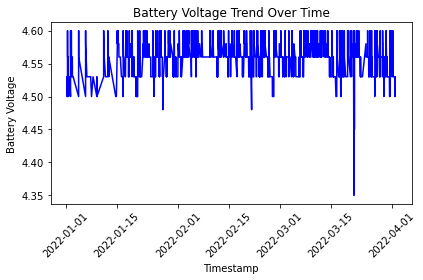

In [22]:
# Analyze battery voltage trends
plt.plot(data['timestamp'], data['vgsm'], color='blue')
plt.xlabel("Timestamp")
plt.ylabel("Battery Voltage")
plt.title("Battery Voltage Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()